In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

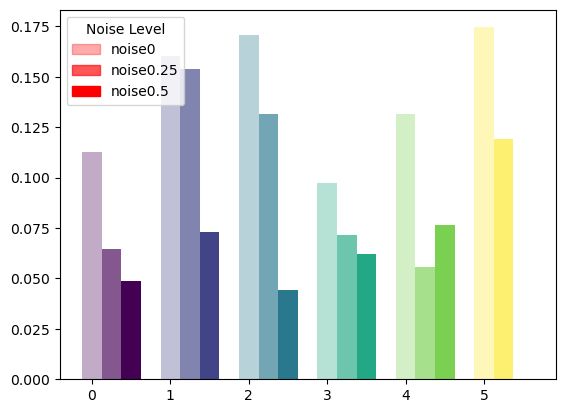

In [24]:
# MAP@10 big plot
folder_path = "./"
# datasets = ['movies', 'recipes', 'restaurants']
datasets = ['recipes']
methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
noise_levels = ['noise0', 'noise0.25', 'noise0.5']
alphas = [0.33, 0.66, 1]
fig = plt.figure()  

# Set up colours
colors = mpl.colormaps['viridis']
colors = [colors(i) for i in np.linspace(0, 1, len(methods))]

for axis_num in range(len(datasets)):

    ax = fig.add_subplot(1,len(datasets),axis_num+1)

    x = np.arange(len(methods))  # the label locations
    width = 0.25  # the width of the bars

    # Create empty results array - rows are methods, columns are noise levels
    results = np.zeros((len(methods), len(noise_levels)))

    for noise_count, noise_level in enumerate(noise_levels): # Fill results array
        exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/best/{noise_level}/aggregated_results.csv")
        for row_num in range(len(exp_results)):
            results[row_num, noise_count] = exp_results.loc[row_num, "map@9"]

    # Plot bars on subplot
    multiplier = 0
    for col_num, noise_level in enumerate(noise_levels):
        offset = width * multiplier
        rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
        # ax.bar_label(rects, padding=3)
        multiplier += 1

# Colour legend
methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(methods))]
methods_legend = plt.legend(methods_handles, [method for method in methods], title='Method', loc=1)

# Opacity legend
alpha_patches = [mpatches.Patch(color='red', alpha=alphas[i], label=noise_levels[i]) for i in range(len(noise_levels))]
# noise_handles = [plt.Rectangle((0,0),1,1, color='black', alpha=alphas) for i in range(len(noise_levels))]
noise_legend = plt.legend(handles=alpha_patches, title='Noise Level', loc=2)

# Add colour legend back
plt.gca().add_artist(methods_legend)

# Save and show 
file_name = "big_MAPat10_plot.png"
fig.savefig(file_name)

plt.show()